# CH4. Logistic Regression

## 로지스틱 회귀란?
우리가 지금까지 사용한 **선형회귀분석**으로는 종속변수가 연속적인 경우에 사용할 수 있다.  
그러나 종속변수가 이진, 혹은 여러개의 특정 범주로 이루어져 있을 경우에는 일반적인 선형회귀분석으로는 분석하기가 어렵다.  
이진 데이터를 처리하는 문제로 예를 들어보면,  
`환자가 질병에 걸렸다 / 안걸렸다.`를 분석할 때, 이러한 데이터들은 선형적으로 처리하기 힘들다.  
따라서 우리는 로지스틱 회귀방법을 사용해 위와 같은 데이터들을 알맞게 분류하고 원하는 데이터를 추출할 수 있게 된다.  
따라서 로지스틱 회귀는 회귀적으로 접근하기보단 데이터를 분류하는것으로 접근한다.    
지금 부터 따라하면서 로지스틱 회귀에 대해서 배워보자.  


## 이진 분류
처음부터 여러가지 범주를 분석하는 것은 어려울 수 있으므로  
먼저 종속변수가 `0 또는 1`인 이진변수의 경우를 한번 살펴보자.  

우리는 독립변수 `X`가 종속변수 `y`로 분류되는 데이터에 대해서 분석을 해볼텐데,  
먼저 가상의 데이터를 만들어보자.  


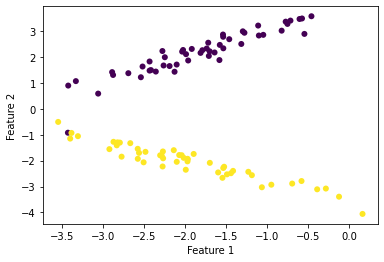

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, 
                          class_sep=2.0, random_state=101)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, linewidth=0, edgecolor=None)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

위 코드에서 우리는 `make_classification`을 통해서 100개의 `X`데이터와 `y`데이터를 가상으로 만들었다.  
즉, 100개의 `X`인풋에 대해서 0또는 1로 분류한 `y`데이터가 생겼다.  

이것을 어떻게 분류문제에서 회귀문제로 바꿀수 있을까? 확률을 이용한다.  
지금부터 우리는 분류 문제에 대해 `X의 아웃풋이 1이다.`가 아니라,  
`X의 아웃풋이 1이될 확률이 1.0이다.`라고 생각하고 문제에 접근할 것이다.  
이렇게 변환한다면, 각각의 인풋값이 아웃풋으로 연결되는것이 이진 분류가 아닌 선형적인 확률값으로 나타나게 되고,  
우리는 선형회귀방법을 적용해볼 수 있다.  

아래 예시를 따라해보면서 확인해보자.  

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), test_size=0.33, random_state=101)
y_test

array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.])

위에서 만든 가상 데이터 셋을 훈련집합과 테스트 집합으로 나누었고, `y`값을 소수점으로 변환하였다.  
이제 위에서 설명한 것과 같이, `y`값이 1이면 `100%`확률로 아웃풋이 1이 되고, 0이라면 `0%`확률로 1이라는 뜻이다.  

선형 회귀를 적용해보자.  

In [4]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)

array([-0.19021825,  1.14481132,  1.16345687,  0.00906543,  0.17492642,
        0.75010591,  0.01764075,  0.69408067,  0.99490823,  0.98471815,
        0.01184894,  0.91408215,  0.77985749,  0.66302112,  0.04339816,
        0.19057929,  1.19126856,  0.01473595,  0.80911677, -0.03827048,
       -0.08450995, -0.22769924,  0.57176711,  0.75836004,  1.02104676,
        1.06148483,  0.873505  ,  1.04779876, -0.1655144 ,  0.66570701,
       -0.01700988,  1.03270133,  0.00856569])

선형회귀를 해봤는데 문제가 생겼다.  
우리는 단지 소수점 값에 대해서 선형회귀를 적용한 것이지,  
정확히 확률에 대해서 선형회귀를 진행한 것이 아니기 때문에, 0미만의 값과, 1초과의 값이 포함된다.  

이를 해결하기 위해서 우리는 아웃풋을 시그모이드곡선에 매핑할 것이다.  
수식을 쓰기가 굉장히 불편하므로, 수식에대한 자세한 설명은  
[여기](https://ratsgo.github.io/machine%20learning/2017/04/02/logistic/)를 참고하자


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        15
         1.0       0.95      1.00      0.97        18

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



위에서 만든 훈련 데이터로  
sklearn에서 제공하는 로지스틱 회귀를 적용해 데이터를 적합`(fit)`시키고,  
이 데이터를 가지고 `X_test`데이터를 예측`(predict)`해봤다.  

정확도는 0.97로 매우 정확한 예측을 보여준다.  

예측 값은 비교적 정확하게 나왔으니,  
이제, 어떤값들이 0이고, 어떤 값들이 1인지, [결정경계](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%EA%B2%BD%EA%B3%84)를 시각적으로 확인해보자.  

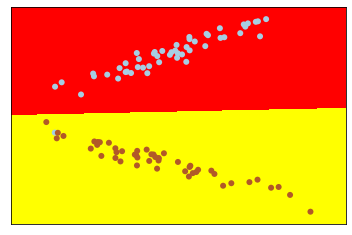

In [8]:
import numpy as np

h = .02 #데이터의 격자 크기

# 그림의 크기(경계) 지정
x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', linewidth=0,
           cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

1은 노란색이고, 0은 빨간색이다.  
위 그림에서 보면 알 수 있듯이 33개의 테스트 데이터중  
단 하나의 데이터만 잘못 분류되어 있음을 알 수 있다.  

이제는 분류를 하는것을 넘어서 진짜 확률을 계산해 볼텐데,  
`predict_proba`메소드를 사용하면 편리하다.  

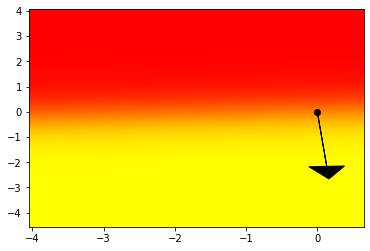

In [9]:
# predict_proba 메소드의 1번 인덱스 값만 사용
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

plt.arrow(0, 0, clf.coef_[0][0], clf.coef_[0][1], head_width=0.5,
         head_length=0.5, fc='k', ec='k')
plt.scatter(0,0,marker='o',c='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

우리는 `predict_proba`메소드의 1번 인덱스값,  
분류의 값이 1이될 확률이 1인 것을 위주로 알아보려고 코드를 짰다.  

그래프에서 순수한 빨강, 순수한 노란색은 예측확률이 각각 0,1에 근사한경우이다.  
검정색 점은 원점`(0,0)`이고, 화살표는 가중치벡터를 나타낸다.  
이에 대한 자세한 설명은 [여기](https://medium.com/elice/%EC%BB%B4%EA%B3%B5%EC%83%9D%EC%9D%98-ai-%EC%8A%A4%EC%BF%A8-%ED%95%84%EA%B8%B0-%EB%85%B8%ED%8A%B8-%E2%91%A1-%EC%84%A0%ED%98%95-%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-linear-classification-model-93ba8c8fd249)를 참고해서 공부해보자.  


## 로지스틱 회귀의 장단점

**장점**
- 선형적이다. 따라서 선형회귀와 동등하게 분석이 가능하다.  
- 이해하기 쉽다(?)  
- 훈련이 간단하다. 적은 개수를 가지기 때문에, 가중치 벡터만 저장하면 모델을 저장할 수 있다.  
- 빠르게 훈련이 가능해 효율적이다.  
- 이진분류 뿐만 아니라 다중클래스 분류를 위한 확장 기능을 가진다.  

**단점**
- 비교적 간단한 알고리즘이기 때문에, 고급알고리즘에 비해 성능이 떨어진다. 또한, 유연성이 부족하다.  
- 선형적이다. 비선형의 문제의 경우 데이터를 적합시킬 수 없다.

## 다중 클래스 로지스틱 회귀

이제 이진 분류가 아니고, 여러개를 분류하기 위해서 로지스틱 회귀를 확장시켜보자.  
책에서 든 예를 보자 3종류의 꽃`(f1, f2, f3)`을 분류하려고 한다.  
이를 세가지 문제로 나누어 해결하는 방법이 있다.  

- 문제1: f1이 긍정, f2,f3가 부정
- 문제2: f2이 긍정, f1,f3가 부정
- 문제3: f3이 긍정, f1,f2가 부정  

이렇게 나누었을 경우, 이진분류로 나눌 수 있다.  

일단 더미데이터를 만들어서 실습을 시작해보자.  

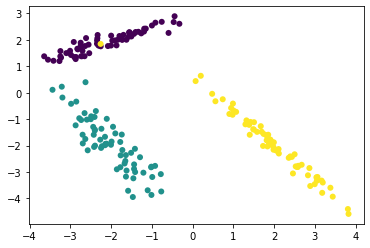

In [1]:

%reset -f
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=200, n_features=2,
                         n_classes=3, n_informative=2,
                         n_redundant=0, n_clusters_per_class=1,
                          class_sep=2.0, random_state=101)

plt.scatter(X[:,0], X[:,1], marker='o', c=y, linewidth=0, edgecolor=None)
plt.show()

이제 이 데이터들을 위에서처럼 훈련 데이터와, 테스트 데이터로 나누어서  
모델을 훈련시키고 예측해보자.  

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y.astype(float),
                                                   test_size=0.33,
                                                   random_state=101)
clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       1.00      1.00      1.00        22
         2.0       1.00      1.00      1.00        20

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



이 데이터들의 결정경계를 확인해보자.

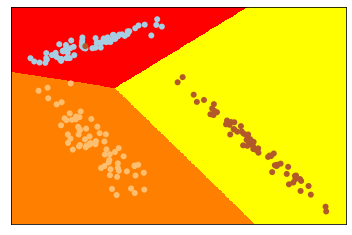

In [3]:
import numpy as np

h = .02

x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', linewidth=0,
           cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

이제 데이터가 분류되는 확률을 확인해보자.  

In [6]:
clf.predict_proba([X_test[0]]),clf.predict_proba([X_test[1]]),clf.predict_proba([X_test[2]])

(array([[0.85126747, 0.13897348, 0.00975905]]),
 array([[7.74023900e-05, 8.94377817e-03, 9.90978819e-01]]),
 array([[1.23211452e-04, 1.53062678e-02, 9.84570521e-01]]))

각각의 값이 세가지 분류에 속할 확률을 볼 수 있다.  